In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import cifar10

2024-04-08 21:35:37.655756: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 21:35:37.659710: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 21:35:37.709186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 21:35:38.843826: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
def normalize_img_data(img):
    return cv2.normalize(img, img, 0, 1.0, cv2.NORM_MINMAX)

In [6]:
def preprocess_images(images):
    processed_img_out = []
    for image in images:
        processed_img_out.append(normalize_img_data(convert_to_grayscale(image)))
    return np.array(processed_img_out).reshape(-1, 1024)


In [7]:
X_train_processed = preprocess_images(X_train)
X_test_processed = preprocess_images(X_test)
y_train_processed = y_train.flatten() 
y_test_processed = y_test.flatten()

In [8]:
img_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
clf = MLPClassifier(hidden_layer_sizes = (128,), max_iter=500, random_state = 42, early_stopping=True, activation='relu').fit(X_train_processed, y_train_processed)

In [10]:
dump(clf, "mlp_classifier.joblib")

['mlp_classifier.joblib']

In [11]:
y_pred = clf.predict(X_test_processed)

In [12]:
with open("../out/nn_report.txt", "w") as file:
        file.write(classification_report(y_test_processed, y_pred, target_names=img_labels))

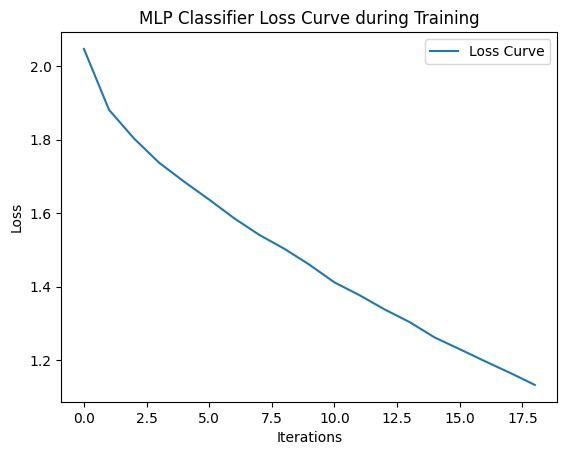

In [13]:
plt.plot(clf.loss_curve_, label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Classifier Loss Curve during Training')
plt.legend()
plt.show()